<a href="https://colab.research.google.com/github/rahul2240/kaggle/blob/master/sihml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google_images_download

    100% |████████████████████████████████| 911kB 18.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download


In [0]:
rm -rf './downloads/downloads'

In [51]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"land pollution","limit":100, "image_directory": './landpollution', "format": "jpg", "type": "photo"}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)


Item no.: 1 --> Item name = land pollution
Evaluating...
Starting Download...
Completed Image ====> 1. 155881-004-bc699b42.jpg
Completed Image ====> 2. landfill-waste-management-waste-1.jpg
Completed Image ====> 3. 120821-f-bp133-050.jpg
Completed Image ====> 4. pollution_from_oil_well-e1431003175321.jpg
Completed Image ====> 5. landfill.jpg
Completed Image ====> 6. land-pollution_1e75ebc00c846c39.jpg
Completed Image ====> 7. 64a0f1c846da47f599332e20717e18dc.jpg
Completed Image ====> 8. landfill.jpg
Completed Image ====> 9. b955.jpg
Completed Image ====> 10. m2_ss7_fig7.10.jpg
Completed Image ====> 11. 1200-8609-land-pollution-photo2.jpg
Completed Image ====> 12. 300px-landfill.jpg
Completed Image ====> 13. land-pollution-effect.jpg
Completed Image ====> 14. 212086-677x450-trash.jpg
Completed Image ====> 15. 1200-8609-land-pollution-photo1.jpg
Completed Image ====> 16. land-pollution-1.jpg
Completed Image ====> 17. land-pollution-400x245.jpg
Completed Image ====> 18. main-qimg-af023cc

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -R "/content/drive/My Drive/sih/downloads" "/content"

In [15]:
!ls

downloads  drive  sample_data


In [0]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import os

folder="./downloads/waterpollution"
for root, dirs, files in os.walk(folder):
    for i,f in enumerate(files):
        absname = os.path.join(root, f)
        newname = os.path.join(root, str(i)+".jpg")
        os.rename(absname, newname)

In [0]:
train_transform = transforms.Compose([transforms.RandomRotation(30),
                               transforms.RandomResizedCrop(224),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485, 0.456, 0.406],
                                                    [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.Resize(255),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485, 0.456, 0.406],
                                                    [0.229, 0.224, 0.225])])


train_data = datasets.ImageFolder("./downloads", transform = train_transform)

valid_size = 0.2
l = list(range(len(train_data)))
np.random.shuffle(l)
split = int(np.floor(valid_size*len(train_data)))
train_idx, valid_idx = l[split:], l[:split]

train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = 20, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, sampler=valid_sampler, batch_size = 20)


In [0]:
#rm -rf './downloads/landpollution'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([20, 3, 224, 224])


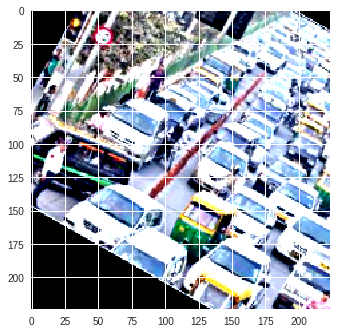

In [53]:

import matplotlib.pyplot as plt
import matplotlib.image as image

first = iter(train_loader)
image, label = next(first)
print(image.shape)
image = image.numpy()
image = image[0] / 2 + 0.5  # unnormalize
plt.imshow(np.transpose(image, (1, 2, 0)))

In [54]:
model = models.densenet121(pretrained=True)
model

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [55]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 4),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [56]:
from tqdm import tqdm_notebook
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in tqdm_notebook(train_loader):
        # move tensors to GPU if CUDA is available
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model.forward(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model.forward(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.415603 	Validation Loss: 0.193381
Validation loss decreased (inf --> 0.193381).  Saving model ...


Epoch: 2 	Training Loss: 0.713618 	Validation Loss: 0.123866
Validation loss decreased (0.193381 --> 0.123866).  Saving model ...


Epoch: 3 	Training Loss: 0.511558 	Validation Loss: 0.120209
Validation loss decreased (0.123866 --> 0.120209).  Saving model ...


Epoch: 4 	Training Loss: 0.885643 	Validation Loss: 0.230067


Epoch: 5 	Training Loss: 0.660191 	Validation Loss: 0.160704


Epoch: 6 	Training Loss: 0.518688 	Validation Loss: 0.095228
Validation loss decreased (0.120209 --> 0.095228).  Saving model ...


Epoch: 7 	Training Loss: 0.436451 	Validation Loss: 0.101982


Epoch: 8 	Training Loss: 0.340279 	Validation Loss: 0.078835
Validation loss decreased (0.095228 --> 0.078835).  Saving model ...


Epoch: 9 	Training Loss: 0.408611 	Validation Loss: 0.098110


Epoch: 10 	Training Loss: 0.397823 	Validation Loss: 0.051130
Validation loss decreased (0.078835 --> 0.051130).  Saving model ...


Epoch: 11 	Training Loss: 0.284700 	Validation Loss: 0.105452


Epoch: 12 	Training Loss: 0.546012 	Validation Loss: 0.119025


Epoch: 13 	Training Loss: 0.343691 	Validation Loss: 0.062528


Epoch: 14 	Training Loss: 0.367318 	Validation Loss: 0.069617


Epoch: 15 	Training Loss: 0.372851 	Validation Loss: 0.094857


Epoch: 16 	Training Loss: 0.314733 	Validation Loss: 0.065043


Epoch: 17 	Training Loss: 0.432733 	Validation Loss: 0.118827


Epoch: 18 	Training Loss: 0.494123 	Validation Loss: 0.113882


Epoch: 19 	Training Loss: 0.393019 	Validation Loss: 0.106194


Epoch: 20 	Training Loss: 0.314969 	Validation Loss: 0.107154


Epoch: 21 	Training Loss: 0.287572 	Validation Loss: 0.071561


Epoch: 22 	Training Loss: 0.440560 	Validation Loss: 0.106264


Epoch: 23 	Training Loss: 0.437531 	Validation Loss: 0.064035


Epoch: 24 	Training Loss: 0.218236 	Validation Loss: 0.096469


Epoch: 25 	Training Loss: 0.273074 	Validation Loss: 0.105734


Epoch: 26 	Training Loss: 0.315612 	Validation Loss: 0.058749


Epoch: 27 	Training Loss: 0.405739 	Validation Loss: 0.090400


Epoch: 28 	Training Loss: 0.316572 	Validation Loss: 0.067822


Epoch: 29 	Training Loss: 0.272146 	Validation Loss: 0.080471


Epoch: 30 	Training Loss: 0.284329 	Validation Loss: 0.087000


In [0]:
model.load_state_dict(torch.load('model_cifar.pt'))

In [62]:
model.to("cpu")

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [63]:
model.eval()
from PIL import Image
def image_loader(loader, image_name):
    image = Image.open(image_name)
    image = loader(image).float().cpu()
    image = torch.tensor(image, requires_grad=True)
    image = image.unsqueeze(0)
    image = image
    return image

data_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

print( model(image_loader(data_transforms, './465ae8953b7743728b1387a8d104c18c.jpeg')).detach().numpy())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


[[-4.724968   -1.1337769  -7.839404   -0.40209126]]
